## Imports

In [1]:
import numpy as np
import tensorflow.keras as tf # for mnist dataset
import matplotlib.pyplot as plt

## Dataset

In [2]:
(train_images, train_labels),(test_images, test_labels) = tf.datasets.mnist.load_data() # loading dataset

## Assertion and reshaping

In [82]:
train_images = train_images.reshape(60000, 784)
train_images = train_images.T
assert train_images.shape == (784, 60000)
assert train_labels.shape == (60000, )

test_images = test_images.reshape(10000, 784)
test_images = test_images.T
assert test_images.shape == (784, 10000)
assert test_labels.shape == (10000,)

## Some useful functions for later

In [83]:
def init_params():
    W1 = np.random.randn(128,784)
    b1 = np.random.randn(128,1)
    W2 = np.random.randn(10,128)
    b2 = np.random.randn(10,1)
    return W1, b1, W2, b2

In [5]:
def ReLU(x):
    return np.maximum(x,0)

In [6]:
def softmax(x):
    exp_x = np.exp(x-np.max(x))
    return exp_x / np.sum(exp_x)

In [7]:
def ReLU_deriv(x):
    return x > 0

In [53]:
def one_hot_labels(labels):
    return np.eye(10)[labels].T

In [9]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 + learning_rate * dW1
    b1 = b1 + learning_rate * db1
    W2 = W2 + learning_rate * dW2
    b2 = b2 + learning_rate * db2
    return W1, b1, W2, b2

In [10]:
def predict(output):
    return np.argmax(output)

In [11]:
def get_accuracy(output, training_input):
    return np.sum(output == training_input) / training_input.size

## Propagation functions and gradient descent

In [51]:
def forward_prop(x,W1,b1,W2,b2): # 2-layer-network with relu und softmax
    Y1 = np.dot(W1, x) + b1
    output_1 = ReLU(Y1)
    Y2 = np.dot(W2, output_1) + b2
    output = softmax(Y2)
    return Y1, output_1, Y2, output

In [70]:
def back_prop(x, training_input, Y1, output_1, Y2, output, W2):
    n = training_input.size
    one_hot_ti = one_hot_labels(training_input)
    d_output = one_hot_ti - output
    dW2 =1/n *  np.dot(d_output, output_1.T)
    db2 = 1/n * np.sum(d_output)
    d_output1 = ReLU_deriv(Y1) * np.dot(W2.T, d_output)
    dW1 = 1/n * np.dot(d_output1, x.T)
    db1 = 1/n * np.sum(d_output1)
    return dW1, db1, dW2, db2

In [73]:
def gradient_descent(epochs, x, training_input, learning_rate):
    W1, b1, W2, b2 = init_params()
    for i in range(epochs-1):
        Y1, output1, Y2, output = forward_prop(x, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = back_prop(x, training_input, Y1, output1, Y2, output, W2)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if i % 25 == 0:
            print(f'iteration: {i}')
            print(f'training accuracy: {get_accuracy(predict(output), training_input)}')
    return W1, b1, W2, b2

## Functions for testing

In [26]:
def show(idx, test_or_train='train'):
    if test_or_train=='test':
        plt.imshow(test_images[:, idx].reshape((28,28)))
    else:
        plt.imshow(train_images[:, idx].reshape((28,28)))

In [16]:
def test_accuracy(W1, b1, W2, b2):
    _, _, _, output = forward_prop(test_images, W1, b1, W2, b2)
    predictions = predict(output)
    return np.sum(predictions == test_labels) / test_labels.size

In [80]:
def test(test_idx, W1, b1, W2, b2):
    _, _, _, output = forward_prop(test_images[:, test_idx], W1, b1, W2, b2)
    print(f'prediction: {prediction}')
    print(f'label: {test_labels[test_idx]}')
    show(test_idx, 'test')

## Running

In [72]:
W1, b1, W2, b2 = gradient_descent(200, train_images, train_labels, 0.2)

iteration: 1
training accuracy: 0.0
iteration: 26
training accuracy: 0.0
iteration: 51
training accuracy: 0.0
iteration: 76
training accuracy: 0.0


C:\Users\Benfa\AppData\Local\Temp\ipykernel_5368\1690286192.py:2: RuntimeWarning: invalid value encountered in subtract
  exp_x = np.exp(x-np.max(x))


iteration: 101
training accuracy: 0.09871666666666666
iteration: 126
training accuracy: 0.09871666666666666
iteration: 151
training accuracy: 0.09871666666666666
iteration: 176
training accuracy: 0.09871666666666666


In [75]:
print(test_accuracy(W1, b1, W2, b2))

0.098


(10, 128)
prediction: 0
label: 7


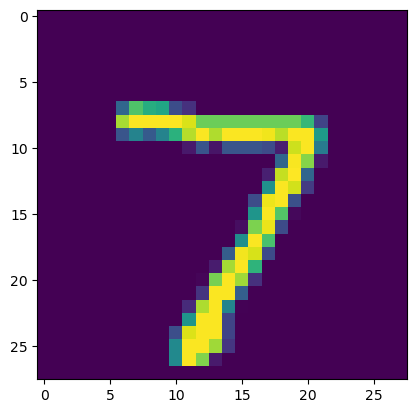

In [79]:
test(0, W1, b1, W2, b2)